In [401]:
# Import Libraries

from datetime import datetime as dt
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt


import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support as score

from sklearn.externals import joblib

import warnings
import itertools

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [284]:
# Clean Dataset

olist_csv = './datasets/olist_csv.csv'

In [285]:
# ReadCSV

olist = pd.read_csv(olist_csv)

In [286]:
olist.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lng,customer_geolocation_lat,order_id,order_status,order_purchase_timestamp,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,"""8a2e7ef9053dea531e4dc76bd6d853e6""","""64190b91b656ab8f37eb89b93dc84584""","""13380""",nova odessa,SP,-45.880753,-23.235966,a548910a1c6147796b98fdf73dbeba33,delivered,2018-02-28 12:25:19,...,1.0,credit_card,1.0,88.09,80e641a11e56f04c1ad469d5645fdfde,5.0,NaN,NaN,2018-03-10,00:00:00;;;;;;;;;;;;;;;;;;
1,e226dfed6544df5b7b87a48208690feb,"""1d47144362c14e94ccdd213e8ec277d5""","""44571""",santo antonio de jesus,BA,-45.818479,-20.934634,f9e4b658b201a9f2ecdecbb34bed034b,delivered,2018-02-03 09:56:22,...,1.0,credit_card,1.0,194.12,228ce5500dc1d8e020d8d1322874b6f0,5.0,NaN,NaN,2018-02-17,00:00:00;;;;;;;;;;;;;;;;;;
2,eecafc3ff695f031bfe354a9fff9d437,bda84be75dfc9588ae63cfe827080b9b,"""01536""",sao paulo,SP,-47.653256,-22.692313,b18dcdf73be66366873cd26c5724d1dc,delivered,2018-04-06 22:18:54,...,1.0,credit_card,1.0,462.70,15197aa66ff4d0650b5434f1b46cda19,1.0,NaN,NaN,2018-04-13,00:00:00;;;;;;;;;;;;;;;;;;
3,eecafc3ff695f031bfe354a9fff9d437,bda84be75dfc9588ae63cfe827080b9b,"""01536""",sao paulo,SP,-47.653256,-22.692313,b18dcdf73be66366873cd26c5724d1dc,delivered,2018-04-06 22:18:54,...,1.0,credit_card,1.0,462.70,15197aa66ff4d0650b5434f1b46cda19,1.0,NaN,NaN,2018-04-13,00:00:00;;;;;;;;;;;;;;;;;;
4,eecafc3ff695f031bfe354a9fff9d437,bda84be75dfc9588ae63cfe827080b9b,"""01536""",sao paulo,SP,-43.957665,-19.833041,b18dcdf73be66366873cd26c5724d1dc,delivered,2018-04-06 22:18:54,...,1.0,credit_card,1.0,462.70,15197aa66ff4d0650b5434f1b46cda19,1.0,NaN,NaN,2018-04-13,00:00:00;;;;;;;;;;;;;;;;;;
5,eecafc3ff695f031bfe354a9fff9d437,bda84be75dfc9588ae63cfe827080b9b,"""01536""",sao paulo,SP,-47.653256,-22.692313,b18dcdf73be66366873cd26c5724d1dc,delivered,2018-04-06 22:18:54,...,1.0,credit_card,1.0,462.70,15197aa66ff4d0650b5434f1b46cda19,1.0,NaN,NaN,2018-04-13,00:00:00;;;;;;;;;;;;;;;;;;
6,"""840be0730010e9580efd289bc9f37706""",dcd4940b3f96a3e2b73d8f73387230cf,"""08412""",sao paulo,SP,-48.809349,-21.734663,e48aa0d2dcec3a2e87348811bcfdf22b,delivered,2017-06-30 15:38:46,...,1.0,credit_card,2.0,58.75,07f9bee5d1b850860defd761afa7ff16,5.0,NaN,NaN,2017-07-16,00:00:00;;;;;;;;;;;;;;;;;;
7,"""98f485515e575607a8003b17e91990bd""",c7b4fb0959a97e7033ff9bef3b1e2ba9,"""27521""",resende,RJ,-50.067913,-21.428935,c31a859e34e3adac22f376954e19b39d,delivered,2018-08-07 23:12:29,...,1.0,credit_card,3.0,198.96,7c6400515c67679fbee952a7525281ef,5.0,NaN,NaN,2018-08-14,00:00:00;;;;;;;;;;;;;;;;;;
8,a5224bdc7685fd39cd7a23404415493d,"""2bf6fd4ad93eb21b3d604481c48decbf""","""01306""",sao paulo,SP,-54.252211,-28.272303,b9bf720beb4ab3728760088589c62129,delivered,2018-05-14 10:29:02,...,1.0,credit_card,8.0,613.25,8670d52e15e00043ae7de4c01cc2fe06,4.0,recomendo,aparelho,eficiente.,no;;;;;;;;;;;;;;;;;;
9,"""272b46feddddc51904608ddd90feee33""","""485fa1b8db05ed6fa0062ece4ce80d2e""","""35180""",timoteo,MG,-46.714952,-23.575142,cdf9aa68e72324eeb25c7de974696ee2,delivered,2017-12-13 14:59:45,...,1.0,credit_card,1.0,136.99,c9cfd2d5ab5911836ababae136c3a10c,5.0,NaN,NaN,2017-12-23,00:00:00;;;;;;;;;;;;;;;;;;


In [287]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112569 entries, 0 to 112568
Data columns (total 43 columns):
customer_id                      112569 non-null object
customer_unique_id               112569 non-null object
customer_zip_code_prefix         112569 non-null object
customer_city                    112569 non-null object
customer_state                   112569 non-null object
customer_geolocation_lng         112569 non-null float64
customer_geolocation_lat         112569 non-null float64
order_id                         112569 non-null object
order_status                     112569 non-null object
order_purchase_timestamp         112569 non-null object
order_approved_at                112569 non-null object
order_delivered_carrier_date     112569 non-null object
order_delivered_customer_date    112569 non-null object
order_estimated_delivery_date    112569 non-null object
order_item_id                    112569 non-null int64
shipping_limit_date              112569 non-null

In [288]:
olist.shape

(112569, 43)

In [289]:
def get_purchase_date(order_purchase_date):
    '''
    Convert DateTimeStamp to Date
    '''
    purchase_date = pd.to_datetime(order_purchase_date)
    return purchase_date.date()

In [290]:
# Change String to DateTime
olist['order_purchase_timestamp'] = olist['order_purchase_timestamp'].apply(get_purchase_date)

In [291]:
# Change String to DateTime
olist['order_purchase_timestamp'] = pd.to_datetime(olist['order_purchase_timestamp'])

In [292]:
olist['order_purchase_timestamp'].max()

Timestamp('2018-09-03 00:00:00')

In [294]:
# Check which is the maximum date. I'll use this date to calculate recency.
import datetime as dt
NOW = dt.datetime(2018, 9, 3)

In [295]:
rfmTable = olist.groupby(by='customer_unique_id').agg(
    {
        'order_purchase_timestamp': lambda x: (NOW - x.max()).days # Recency
         , 'order_id': lambda x: len(x) # Frequency
         , 'price': lambda x: x.sum() # Monetary Value
    }
)

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns =
                {
                    'order_purchase_timestamp': 'recency'
                    , 'order_id': 'frequency'
                    , 'price': 'monetary_value'
                }, inplace=True)

In [296]:
# Validating RFM Table

rfmTable.head()

,recency,frequency,monetary_value
customer_unique_id,,,
"""0000366f3b9a7992bf8c76cfdf3221e2""",116,1,129.90
"""0000b849f77a49e4a4ce2b2a4ca5be3f""",119,1,18.90
"""0000f46a3911fa3c0805444483337064""",542,1,69.00
"""0000f6ccb0745a6a4b88665a16c9f078""",326,1,25.99
"""0004aac84e0df4da2b147fca70cf8255""",293,1,180.00


In [299]:
# Check percentage of requency
rfmTable.frequency.value_counts(normalize=True)

1     0.850521
2     0.110319
3     0.020741
4     0.009516
5     0.003395
6     0.003033
7     0.000778
8     0.000416
9     0.000252
12    0.000230
10    0.000197
11    0.000186
14    0.000077
15    0.000066
13    0.000055
20    0.000044
24    0.000044
21    0.000033
16    0.000022
35    0.000011
75    0.000011
18    0.000011
19    0.000011
22    0.000011
26    0.000011
38    0.000011
Name: frequency, dtype: float64

In [301]:
# Check which cusotmer have 38 freuqncy
rfmTable[rfmTable.frequency == 38]

,recency,frequency,monetary_value
customer_unique_id,,,
"""6fbc7cdadbb522125f4b27ae9dee4060""",345,38,3039.62


In [302]:
# Check data to confirm
olist[olist['customer_unique_id'] == '"6fbc7cdadbb522125f4b27ae9dee4060"']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lng,customer_geolocation_lat,order_id,order_status,order_purchase_timestamp,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5263,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,9.0,voucher,1.0,5.30,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5264,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,9.0,voucher,1.0,5.30,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5265,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,19.0,voucher,1.0,8.42,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5266,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,19.0,voucher,1.0,8.42,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5267,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,5.0,voucher,1.0,9.76,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5268,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,5.0,voucher,1.0,9.76,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5269,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,7.0,voucher,1.0,11.78,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5270,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,7.0,voucher,1.0,11.78,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5271,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,17.0,voucher,1.0,7.51,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;
5272,"""13aa59158da63ba0e93ec6ac2c07aacb""","""6fbc7cdadbb522125f4b27ae9dee4060""","""23070""",rio de janeiro,RJ,-46.357851,-23.479473,fedcd9f7ccdc8cba3a18defedd1a5547,delivered,2017-09-23,...,17.0,voucher,1.0,7.51,7145a6f0d38ec713897856cbdcfcdb7f,5.0,NaN,NaN,2017-10-19,00:00:00;;;;;;;;;;;;;;;;;;


In [303]:
# Check descriptive statistics of all variables
rfmTable.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,91317.0,242.565601,153.001665,0.00,119.0,223.0,351.0,729.0
frequency,91317.0,1.232728,0.823779,1.00,1.0,1.0,1.0,75.0
monetary_value,91317.0,147.910500,244.727192,0.85,48.9,89.9,159.9,13440.0


In [305]:
# I am only interested about percentage anyway
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,119.0,1.0,48.9
0.50,223.0,1.0,89.9
0.75,351.0,1.0,159.9


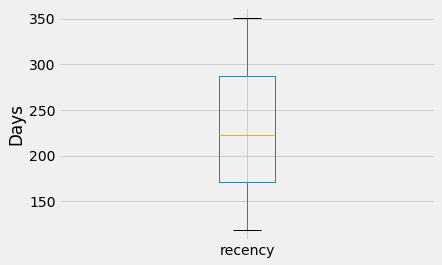

In [307]:
# Draw a boxplot for recency
fig = pd.DataFrame(quantiles).boxplot(column=['recency']).get_figure();
plt.ylabel('Days');
plt.show();
fig.savefig('recency.png', bbox_inches='tight');

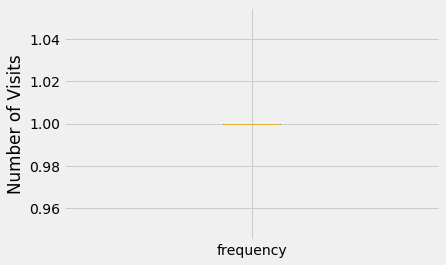

In [309]:
# Draw a boxplot for frequency
fig = pd.DataFrame(quantiles).boxplot(column=['frequency']).get_figure()
plt.ylabel('Number of Visits');
plt.show();
fig.savefig('frequency.png', bbox_inches='tight');

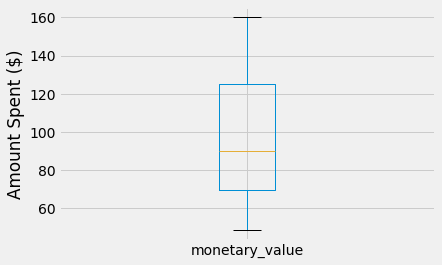

In [310]:
# Draw a boxplot for monetary value
fig = pd.DataFrame(quantiles).boxplot(column=['monetary_value']).get_figure()
plt.ylabel('Amount Spent ($)');
plt.show();
fig.savefig('mponetary_value.png', bbox_inches='tight');

In [311]:
# Create a dictionary
quantiles = quantiles.to_dict()

In [312]:
quantiles

{'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 48.9, 0.5: 89.9, 0.75: 159.9},
 'recency': {0.25: 119.0, 0.5: 223.0, 0.75: 351.0}}

In [334]:
# Create a copy of RFM table. From now on I'll use this.
rfmSegmentation = rfmTable

In [335]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [336]:
# Get correspnding value 
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [337]:
# Create a class
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [338]:
# Check data
rfmSegmentation.head(10)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_unique_id,,,,,,,
"""0000366f3b9a7992bf8c76cfdf3221e2""",116,1,129.90,1,4,2,142
"""0000b849f77a49e4a4ce2b2a4ca5be3f""",119,1,18.90,1,4,4,144
"""0000f46a3911fa3c0805444483337064""",542,1,69.00,4,4,3,443
"""0000f6ccb0745a6a4b88665a16c9f078""",326,1,25.99,3,4,4,344
"""0004aac84e0df4da2b147fca70cf8255""",293,1,180.00,3,4,1,341
"""0004bd2a26a76fe21f786e4fbd80607f""",151,1,154.00,2,4,2,242
"""00050ab1314c0e55a6ca13cf7181fecf""",136,1,27.99,2,4,4,244
"""00053a61a98854899e70ed204dd4bafe""",187,2,382.00,2,1,1,211
"""0005e1862207bf6ccc02e4228effd9a0""",548,1,135.00,4,4,2,442


In [339]:
# Check shape
rfmSegmentation.shape

(91317, 7)

In [340]:
# Check best customers
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].shape

(1648, 7)

In [341]:
# Check worst customers
rfmSegmentation[rfmSegmentation['RFMClass']=='444'].shape

(5516, 7)

In [342]:
# Is there anyone in the middle?
rfmSegmentation[rfmSegmentation['RFMClass']=='333'].shape

(0, 7)

In [343]:
# Check the distribution
rfmSegmentation.RFMClass.value_counts()

144    5572
244    5543
343    5533
444    5516
443    5398
344    5212
142    5078
143    5031
243    4974
242    4837
342    4606
442    4342
441    4109
141    3990
341    3977
241    3949
211    1663
111    1648
311    1627
411    1564
312     999
212     956
112     884
412     870
413     596
113     574
313     542
213     516
414     351
214     294
314     292
114     274
Name: RFMClass, dtype: int64

In [344]:
# Best Customers: 111
# Loyal Customers: X1X
# Big Spenders: XX1
# Almost Lost: 311
# Lost Customers: 411
# Lost Cheap Customers: 444
# Label The Data

rfmSegmentation.loc[rfmSegmentation['F_Quartile']==1, 'CustomerLabel'] = 'Loyal Customer'
rfmSegmentation.loc[rfmSegmentation['M_Quartile']==1, 'CustomerLabel'] = 'Big Spender'
rfmSegmentation.loc[rfmSegmentation['RFMClass']=='111', 'CustomerLabel'] = 'Best Customer'
rfmSegmentation.loc[rfmSegmentation['RFMClass']=='311', 'CustomerLabel'] = 'Almost Lost'
rfmSegmentation.loc[rfmSegmentation['RFMClass']=='411', 'CustomerLabel'] = 'Lost Customer'
rfmSegmentation.loc[rfmSegmentation['RFMClass']=='444', 'CustomerLabel'] = 'Lost Cheap Customer'

In [345]:
# Label all other customer as regular
rfmSegmentation.loc[~rfmSegmentation['CustomerLabel'].isin(['Loyal Customer', 'Big Spender', 'Best Customer', 'Almost Lost', 'Lost Customers', 'Lost Cheap Customers']), 'CustomerLabel'] = 'Regular Customer'

In [346]:
rfmSegmentation.dtypes

recency             int32
frequency           int64
monetary_value    float64
R_Quartile          int64
F_Quartile          int64
M_Quartile          int64
RFMClass           object
CustomerLabel      object
dtype: object

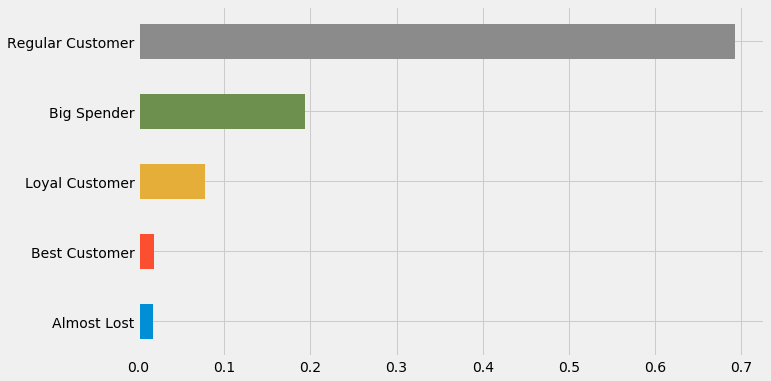

In [347]:
# How is it looking after labelling?
fig = rfmSegmentation['CustomerLabel'].value_counts(normalize=True).sort_values(ascending=True).plot(kind='barh', figsize=(10,6)).get_figure();
fig.savefig('segment.png', bbox_inches='tight');

In [348]:
rfmSegmentation

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,CustomerLabel
customer_unique_id,,,,,,,,
"""0000366f3b9a7992bf8c76cfdf3221e2""",116,1,129.90,1,4,2,142,Regular Customer
"""0000b849f77a49e4a4ce2b2a4ca5be3f""",119,1,18.90,1,4,4,144,Regular Customer
"""0000f46a3911fa3c0805444483337064""",542,1,69.00,4,4,3,443,Regular Customer
"""0000f6ccb0745a6a4b88665a16c9f078""",326,1,25.99,3,4,4,344,Regular Customer
"""0004aac84e0df4da2b147fca70cf8255""",293,1,180.00,3,4,1,341,Big Spender
"""0004bd2a26a76fe21f786e4fbd80607f""",151,1,154.00,2,4,2,242,Regular Customer
"""00050ab1314c0e55a6ca13cf7181fecf""",136,1,27.99,2,4,4,244,Regular Customer
"""00053a61a98854899e70ed204dd4bafe""",187,2,382.00,2,1,1,211,Big Spender
"""0005e1862207bf6ccc02e4228effd9a0""",548,1,135.00,4,4,2,442,Regular Customer


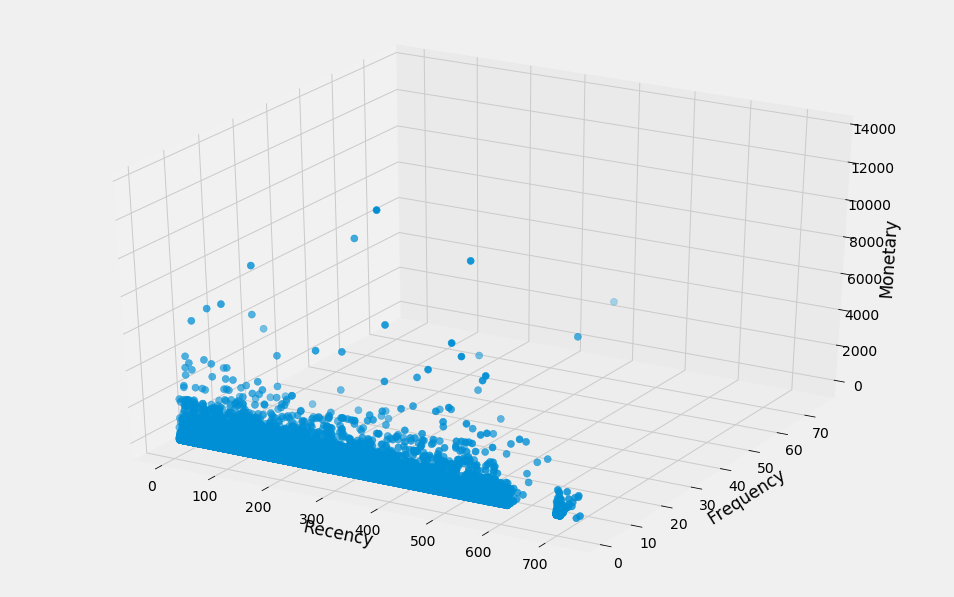

In [349]:
# Create a 3D plot to better view
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfmTable.recency, rfmTable.frequency, rfmTable.monetary_value, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show();

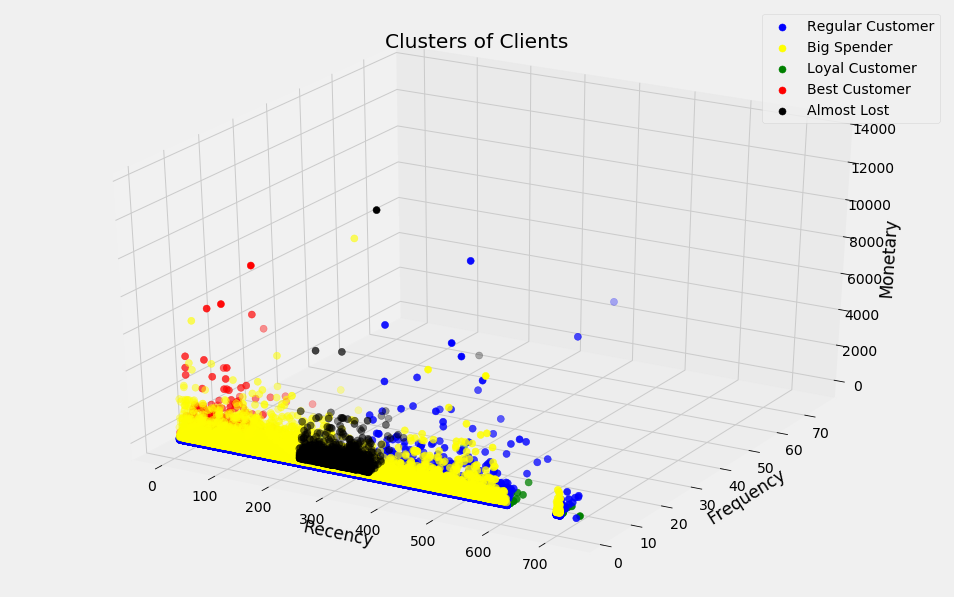

In [350]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red', 'black']
customer_label =  ['Regular Customer', 'Big Spender', 'Loyal Customer', 'Best Customer', 'Almost Lost']

for i in range(0, 5):
    dx.scatter(rfmTable[rfmTable['CustomerLabel'] == customer_label[i]].recency, 
               rfmTable[rfmTable['CustomerLabel'] == customer_label[i]].frequency, 
               rfmTable[rfmTable['CustomerLabel'] == customer_label[i]].monetary_value, 
               c = colors[i], 
               label = customer_label[i], 
               s=50)

dx.set_title('Clusters of Clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

plt.show();

fig.savefig('segment3d.png', bbox_inches='tight');

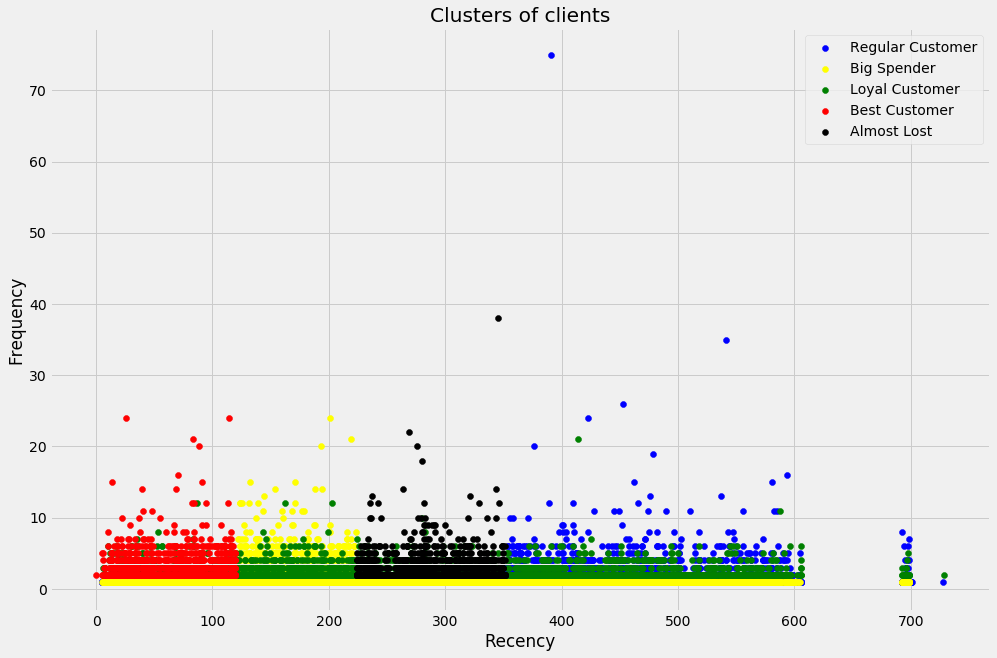

In [351]:
# Add some colors

fig = plt.figure(figsize=(15,10))

c1 = rfmTable[rfmTable['CustomerLabel'] == customer_label[0]]
c2 = rfmTable[rfmTable['CustomerLabel'] == customer_label[1]]
c3 = rfmTable[rfmTable['CustomerLabel'] == customer_label[2]]
c4 = rfmTable[rfmTable['CustomerLabel'] == customer_label[3]]
c5 = rfmTable[rfmTable['CustomerLabel'] == customer_label[4]]

plt.scatter(c1.recency, c1.frequency, c = 'blue', label = customer_label[0])
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = customer_label[1])
plt.scatter(c3.recency, c3.frequency, c = 'green', label = customer_label[2])
plt.scatter(c4.recency, c4.frequency, c = 'red', label = customer_label[3])
plt.scatter(c5.recency, c5.frequency, c = 'black', label = customer_label[4])

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

plt.show();

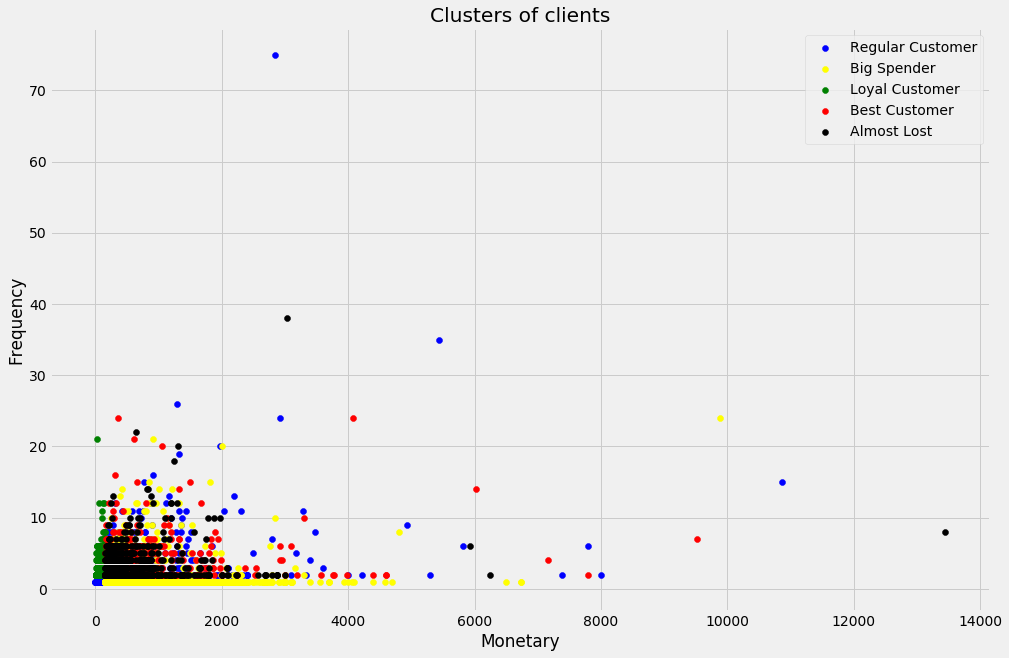

In [352]:
# Create a figure between Monetary and Frequency

fig = plt.figure(figsize=(15,10))

c1 = rfmTable[rfmTable['CustomerLabel'] == customer_label[0]]
c2 = rfmTable[rfmTable['CustomerLabel'] == customer_label[1]]
c3 = rfmTable[rfmTable['CustomerLabel'] == customer_label[2]]
c4 = rfmTable[rfmTable['CustomerLabel'] == customer_label[3]]
c5 = rfmTable[rfmTable['CustomerLabel'] == customer_label[4]]

plt.scatter(c1.monetary_value, c1.frequency, c = 'blue', label = customer_label[0])
plt.scatter(c2.monetary_value, c2.frequency, c = 'yellow', label = customer_label[1])
plt.scatter(c3.monetary_value, c3.frequency, c = 'green', label = customer_label[2])
plt.scatter(c4.monetary_value, c4.frequency, c = 'red', label = customer_label[3])
plt.scatter(c5.monetary_value, c5.frequency, c = 'black', label = customer_label[4])

plt.title('Clusters of clients')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend()

plt.show();

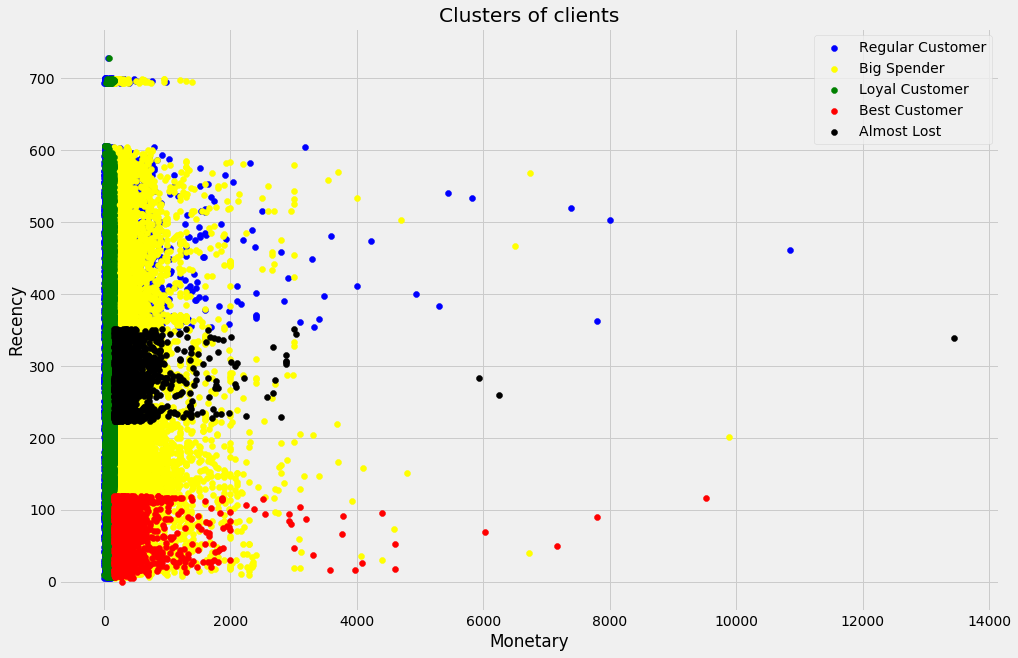

In [353]:
# Create a figure between Monetary and Recency

fig = plt.figure(figsize=(15,10))

c1 = rfmTable[rfmTable['CustomerLabel'] == customer_label[0]]
c2 = rfmTable[rfmTable['CustomerLabel'] == customer_label[1]]
c3 = rfmTable[rfmTable['CustomerLabel'] == customer_label[2]]
c4 = rfmTable[rfmTable['CustomerLabel'] == customer_label[3]]
c5 = rfmTable[rfmTable['CustomerLabel'] == customer_label[4]]

plt.scatter(c1.monetary_value, c1.recency, c = 'blue', label = customer_label[0])
plt.scatter(c2.monetary_value, c2.recency, c = 'yellow', label = customer_label[1])
plt.scatter(c3.monetary_value, c3.recency, c = 'green', label = customer_label[2])
plt.scatter(c4.monetary_value, c4.recency, c = 'red', label = customer_label[3])
plt.scatter(c5.monetary_value, c5.recency, c = 'black', label = customer_label[4])

plt.title('Clusters of clients')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.legend()

plt.show();

In [354]:
rfmTable = rfmTable.reset_index()
rfmTable.head()

,customer_unique_id,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,CustomerLabel
0,"""0000366f3b9a7992bf8c76cfdf3221e2""",116,1,129.90,1,4,2,142,Regular Customer
1,"""0000b849f77a49e4a4ce2b2a4ca5be3f""",119,1,18.90,1,4,4,144,Regular Customer
2,"""0000f46a3911fa3c0805444483337064""",542,1,69.00,4,4,3,443,Regular Customer
3,"""0000f6ccb0745a6a4b88665a16c9f078""",326,1,25.99,3,4,4,344,Regular Customer
4,"""0004aac84e0df4da2b147fca70cf8255""",293,1,180.00,3,4,1,341,Big Spender


In [356]:
# Save the table
rfmTable.to_csv('rfmTable', index=False)

In [357]:
# Merge RFM to original dataframe
olist_class = olist.merge(rfmTable, how='inner', on='customer_unique_id').copy()

In [358]:
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112569 entries, 0 to 112568
Data columns (total 51 columns):
customer_id                      112569 non-null object
customer_unique_id               112569 non-null object
customer_zip_code_prefix         112569 non-null object
customer_city                    112569 non-null object
customer_state                   112569 non-null object
customer_geolocation_lng         112569 non-null float64
customer_geolocation_lat         112569 non-null float64
order_id                         112569 non-null object
order_status                     112569 non-null object
order_purchase_timestamp         112569 non-null datetime64[ns]
order_approved_at                112569 non-null object
order_delivered_carrier_date     112569 non-null object
order_delivered_customer_date    112569 non-null object
order_estimated_delivery_date    112569 non-null object
order_item_id                    112569 non-null int64
shipping_limit_date              112569 

In [360]:
# Predictor Columns
all_columns = [
    'customer_state'
    , 'order_status'
    , 'price'
    , 'freight_value'
    , 'product_category_name_english'
    , 'product_photos_qty'
    , 'product_weight_g'
    , 'product_length_cm'
    , 'product_height_cm'
    , 'product_width_cm'
    , 'payment_sequential'
    , 'payment_type'
    , 'payment_installments'
    , 'payment_value'
    , 'CustomerLabel'
]

In [361]:
# Copy only Predictor and Target Columns
dummy_seek = olist_class[all_columns].copy()
dummy_seek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112569 entries, 0 to 112568
Data columns (total 15 columns):
customer_state                   112569 non-null object
order_status                     112569 non-null object
price                            112569 non-null float64
freight_value                    112569 non-null float64
product_category_name_english    112569 non-null object
product_photos_qty               112569 non-null float64
product_weight_g                 112569 non-null float64
product_length_cm                112569 non-null float64
product_height_cm                112569 non-null float64
product_width_cm                 112569 non-null float64
payment_sequential               112569 non-null float64
payment_type                     112569 non-null object
payment_installments             112569 non-null float64
payment_value                    112569 non-null float64
CustomerLabel                    112569 non-null object
dtypes: float64(10), object(5)
memory u

In [362]:
# Create Dummy Variables for Customer State
dummy_seek = pd.get_dummies(dummy_seek, columns=['customer_state'], prefix=['customer_state'], drop_first=True)
dummy_seek.head()

,order_status,price,freight_value,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,delivered,79.79,8.30,computers_accessories,1.0,245.0,19.0,14.0,14.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,delivered,149.00,45.12,computers_accessories,1.0,6550.0,20.0,20.0,20.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,delivered,99.90,13.20,bed_bath_table,2.0,950.0,46.0,6.0,36.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,delivered,99.90,13.20,bed_bath_table,2.0,950.0,46.0,6.0,36.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,delivered,119.00,4.40,bed_bath_table,1.0,900.0,17.0,22.0,17.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [363]:
# Create Dummy Variables for Order Status
dummy_seek = pd.get_dummies(dummy_seek, columns=['order_status'], prefix=['order_status'], drop_first=True)
dummy_seek.head()

,price,freight_value,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,...,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,order_status_canceled,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,79.79,8.30,computers_accessories,1.0,245.0,19.0,14.0,14.0,1.0,credit_card,...,0,0,1,0,0,1,0,0,0,0
1,149.00,45.12,computers_accessories,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,...,0,0,0,0,0,1,0,0,0,0
2,99.90,13.20,bed_bath_table,2.0,950.0,46.0,6.0,36.0,1.0,credit_card,...,0,0,1,0,0,1,0,0,0,0
3,99.90,13.20,bed_bath_table,2.0,950.0,46.0,6.0,36.0,1.0,credit_card,...,0,0,1,0,0,1,0,0,0,0
4,119.00,4.40,bed_bath_table,1.0,900.0,17.0,22.0,17.0,1.0,credit_card,...,0,0,1,0,0,1,0,0,0,0


In [364]:
# Create Dummy Variables for Product Category
dummy_seek = pd.get_dummies(dummy_seek, columns=['product_category_name_english'], prefix=['product_category_name_english'], drop_first=True)
dummy_seek.head()

,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,...,product_category_name_english_security_and_services,product_category_name_english_signaling_and_security,product_category_name_english_small_appliances,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts
0,79.79,8.30,1.0,245.0,19.0,14.0,14.0,1.0,credit_card,1.0,...,0,0,0,0,0,0,0,0,0,0
1,149.00,45.12,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,1.0,...,0,0,0,0,0,0,0,0,0,0
2,99.90,13.20,2.0,950.0,46.0,6.0,36.0,1.0,credit_card,1.0,...,0,0,0,0,0,0,0,0,0,0
3,99.90,13.20,2.0,950.0,46.0,6.0,36.0,1.0,credit_card,1.0,...,0,0,0,0,0,0,0,0,0,0
4,119.00,4.40,1.0,900.0,17.0,22.0,17.0,1.0,credit_card,1.0,...,0,0,0,0,0,0,0,0,0,0


In [365]:
# Create Dummy Variables for Payment Type
dummy_seek = pd.get_dummies(dummy_seek, columns=['payment_type'], prefix=['payment_type'], drop_first=True)
dummy_seek.head()

,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,...,product_category_name_english_small_appliances_home_oven_and_coffee,product_category_name_english_sports_leisure,product_category_name_english_stationery,product_category_name_english_tablets_printing_image,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,79.79,8.30,1.0,245.0,19.0,14.0,14.0,1.0,1.0,88.09,...,0,0,0,0,0,0,0,1,0,0
1,149.00,45.12,1.0,6550.0,20.0,20.0,20.0,1.0,1.0,194.12,...,0,0,0,0,0,0,0,1,0,0
2,99.90,13.20,2.0,950.0,46.0,6.0,36.0,1.0,1.0,462.70,...,0,0,0,0,0,0,0,1,0,0
3,99.90,13.20,2.0,950.0,46.0,6.0,36.0,1.0,1.0,462.70,...,0,0,0,0,0,0,0,1,0,0
4,119.00,4.40,1.0,900.0,17.0,22.0,17.0,1.0,1.0,462.70,...,0,0,0,0,0,0,0,1,0,0


In [366]:
# Check Columns
dummy_seek.columns

Index(['price', 'freight_value', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_installments', 'payment_value',
       ...
       'product_category_name_english_small_appliances_home_oven_and_coffee',
       'product_category_name_english_sports_leisure',
       'product_category_name_english_stationery',
       'product_category_name_english_tablets_printing_image',
       'product_category_name_english_telephony',
       'product_category_name_english_toys',
       'product_category_name_english_watches_gifts',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher'],
      dtype='object', length=116)

In [367]:
# Get Highcolumn using all other columns
target_column = 'CustomerLabel'
predictor_columns = [s for s in dummy_seek.columns.tolist() if s != target_column]

In [369]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

In [370]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(dummy_seek[predictor_columns], dummy_seek[target_column], random_state = 42)

In [371]:
# Standardize Train and Test
scaling = MinMaxScaler().fit(X_train)

X_trainstd = scaling.transform(X_train)
X_teststd = scaling.transform(X_test)

In [114]:
# Tune Hyper Parameter. It'll take almost a hour. Beware before running this.
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid ={
    "C": np.logspace(-3,3,7)
    , "penalty":["l1","l2"]
}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5)
logreg_cv.fit(X_trainstd, y_train)

print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy : 0.7017743349205221


In [372]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l1', C=1000)
logreg.fit(X_trainstd, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [373]:
# Getting good score 70
logreg.score(X_teststd, y_test)

0.7004228404931955

                  precision    recall  f1-score   support

     Almost Lost       0.32      0.05      0.08      1160
   Best Customer       0.49      0.03      0.06      1194
     Big Spender       0.78      0.60      0.68      5241
  Loyal Customer       0.44      0.16      0.23      4066
Regular Customer       0.71      0.96      0.81     16482

     avg / total       0.66      0.70      0.64     28143



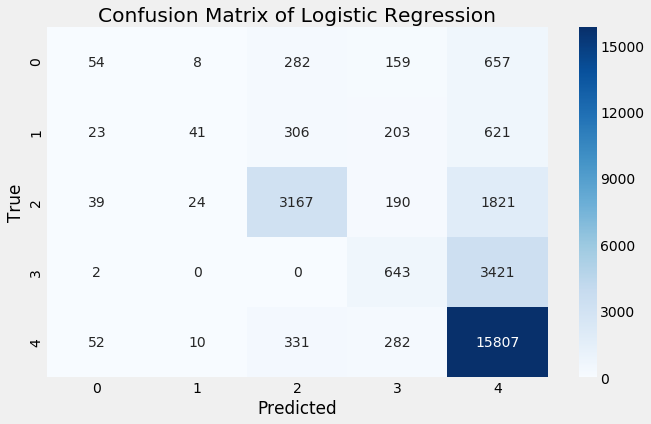

In [386]:
y_pred = logreg.predict(X_teststd)
    
print(classification_report(y_test, y_pred))

# confusion matrix - heat map plot
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

fig.savefig('logisticregression.png', bbox_inches='tight');

In [374]:
# Try Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
model_gaus = MultinomialNB()

# Train the model using the training sets 
model_gaus.fit(X_trainstd, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [376]:
# Score is pretty poor even in training
model_gaus.score(X_trainstd, y_train)

0.5971146329329827

In [377]:
# Test score is low too
model_gaus.score(X_teststd, y_test)

0.5930071420957254

                  precision    recall  f1-score   support

     Almost Lost       0.24      0.01      0.02      1160
   Best Customer       0.47      0.01      0.01      1194
     Big Spender       0.52      0.09      0.15      5241
  Loyal Customer       0.34      0.04      0.07      4066
Regular Customer       0.60      0.97      0.74     16482

     avg / total       0.53      0.59      0.48     28143



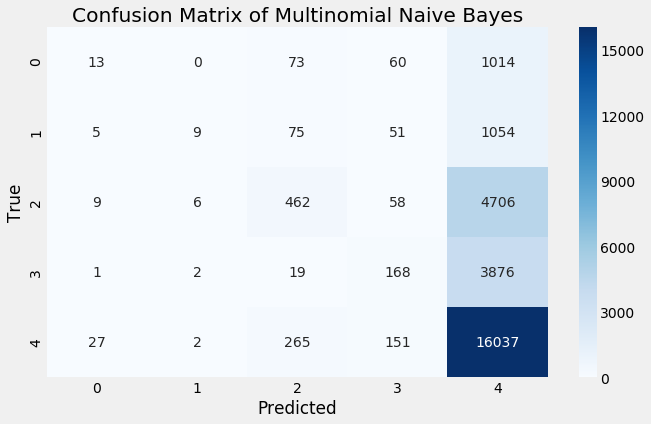

In [387]:
y_pred = model_gaus.predict(X_teststd)
    
print(classification_report(y_test, y_pred))

# confusion matrix - heat map plot
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix of Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

fig.savefig('naivebayes.png', bbox_inches='tight');

In [55]:
random_grid = {
    'n_estimators': [20, 40, 60, 80, 100]
    , 'max_features': ['auto', 'sqrt']
    , 'max_depth': [10, 55, 100, None]
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 25 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [20, 40, 60, 80, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 55, 100, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [56]:
rf_random.best_estimator_, rf_random.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=55, max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False), 0.9016890531352901)

In [378]:
# Fit Random Forest Classfier

clf = RandomForestClassifier(n_estimators=82, max_depth=55, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=55, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [379]:
# Check score. 0.91. Pretty Great.
score = clf.score(X_test, y_test)
score

0.9132643996730981

                  precision    recall  f1-score   support

     Almost Lost       0.89      0.60      0.71      1160
   Best Customer       0.89      0.59      0.71      1194
     Big Spender       0.91      0.93      0.92      5241
  Loyal Customer       0.94      0.81      0.87      4066
Regular Customer       0.91      0.98      0.94     16482

     avg / total       0.91      0.91      0.91     28143



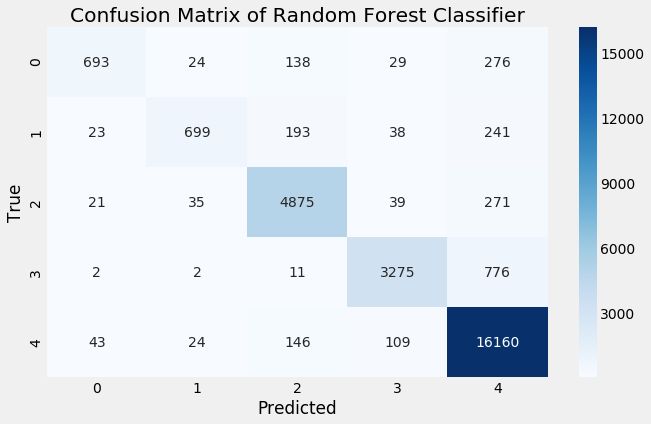

In [388]:
y_pred = clf.predict(X_test)
    
print(classification_report(y_test, y_pred))

# confusion matrix - heat map plot
cm = confusion_matrix(y_test, y_pred)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

fig.savefig('randomforest.png', bbox_inches='tight');

In [380]:
clf.feature_importances_

array([2.34974332e-01, 7.30285373e-02, 1.95475274e-02, 5.71515099e-02,
       3.73125704e-02, 4.04538882e-02, 3.60203023e-02, 1.65738611e-02,
       4.03050464e-02, 3.01089688e-01, 5.09016350e-04, 1.81197592e-04,
       1.97046408e-04, 2.92624554e-03, 1.46647520e-03, 2.18679486e-03,
       2.10436510e-03, 2.27899480e-03, 9.30742465e-04, 6.38987581e-03,
       1.09428779e-03, 1.48846213e-03, 1.10793346e-03, 9.28513014e-04,
       1.72641441e-03, 8.24266415e-04, 4.04363955e-03, 6.76687758e-03,
       7.16209902e-04, 4.93234661e-04, 7.39380510e-05, 4.33386946e-03,
       3.33141558e-03, 5.06236467e-04, 8.95329706e-03, 5.22503027e-04,
       6.81972538e-04, 1.69339058e-03, 4.44011559e-04, 5.35017648e-04,
       8.78619415e-04, 2.00028221e-05, 5.04192054e-04, 1.92682133e-04,
       8.83967450e-05, 3.23131127e-04, 2.27073065e-03, 1.86978189e-03,
       4.51065610e-03, 3.75256630e-04, 1.15496487e-04, 1.48180011e-04,
       1.09609209e-05, 1.96698655e-04, 1.29134133e-04, 3.24873570e-04,
      

In [381]:
# Get feature importance from model and map them with feature names from tfidf     
feature_importances = pd.DataFrame(
    clf.feature_importances_
    , index = X_train.columns
    , columns=['importance']
).sort_values(by='importance', ascending=False)

In [382]:
feature_importances

,importance
payment_value,3.010897e-01
price,2.349743e-01
freight_value,7.302854e-02
product_weight_g,5.715151e-02
product_height_cm,4.045389e-02
payment_installments,4.030505e-02
product_length_cm,3.731257e-02
product_width_cm,3.602030e-02
product_photos_qty,1.954753e-02
payment_sequential,1.657386e-02


In [384]:
customer_label

['Regular Customer',
 'Big Spender',
 'Loyal Customer',
 'Best Customer',
 'Almost Lost']

In [390]:
# Here I'll create a test case when a new customers comes in
X_test.iloc[0]

price                                                                     29.00
freight_value                                                             11.85
product_photos_qty                                                         2.00
product_weight_g                                                         250.00
product_length_cm                                                         16.00
product_height_cm                                                          2.00
product_width_cm                                                          20.00
payment_sequential                                                         1.00
payment_installments                                                       5.00
payment_value                                                             81.70
customer_state_AL                                                          0.00
customer_state_AM                                                          0.00
customer_state_AP                       

In [391]:
# customer_state                   112569 non-null object
# order_status                     112569 non-null object
# price                            112569 non-null float64
# freight_value                    112569 non-null float64
# product_category_name_english    112569 non-null object
# product_photos_qty               112569 non-null float64
# product_weight_g                 112569 non-null float64
# product_length_cm                112569 non-null float64
# product_height_cm                112569 non-null float64
# product_width_cm                 112569 non-null float64
# payment_sequential               112569 non-null float64
# payment_type                     112569 non-null object
# payment_installments             112569 non-null float64
# payment_value                    112569 non-null float64
# CustomerLabel                    112569 non-null object

user_input = {
    'customer_state': 'SP'
    , 'order_status': 'delivered'
    , 'price': 149
    , 'freight_value': 10
    , 'product_category_name_english': 'computers_accessories'
    , 'product_photos_qty': 1
    , 'product_weight_g': 245
    , 'product_length_cm': 20
    , 'product_height_cm': 20
    , 'product_width_cm': 20
    , 'payment_sequential': 1
    , 'payment_type': 'credit_card'
    , 'payment_installments': 1
    , 'payment_value': 194
}

In [392]:
# Create a deploy model dataframe from dictionary

deploy_model = pd.DataFrame([user_input])

In [393]:
deploy_model.shape

(1, 14)

In [394]:
X_test.shape

(28143, 115)

In [395]:
# Shape is not matching with each other. We need to add dummy columns for test also.

In [396]:
# user_input = [2010, 124999.5, 6, 'Diesel', 'BMW']
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(115)
    
    # set the numerical input as they are
    enc_input[0] = data['price']
    enc_input[1] = data['freight_value']
    enc_input[2] = data['product_photos_qty']
    enc_input[3] = data['product_weight_g']
    enc_input[4] = data['product_length_cm']
    enc_input[5] = data['product_height_cm']
    enc_input[6] = data['product_width_cm']
    enc_input[7] = data['payment_sequential']
    enc_input[8] = data['payment_installments']
    enc_input[9] = data['payment_value']
    
    ##################### customer_state #########################
    # get the array of marks categories
    marks = olist_class['customer_state'].unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'customer_state_'+ data['customer_state']
    # search for the index in columns name list 
    mark_column_index = X_test.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    
    ##################### order_status #########################
    # get the array of marks categories
    marks = olist_class['order_status'].unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'order_status_'+ data['order_status']
    # search for the index in columns name list 
    mark_column_index = X_test.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    
    ##################### product_category_name_english #########################
    # get the array of marks categories
    marks = olist_class['product_category_name_english'].unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'product_category_name_english_'+ data['product_category_name_english']
    # search for the index in columns name list 
    mark_column_index = X_test.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    
    ##################### payment_type #########################
    # get the array of marks categories
    marks = olist_class['payment_type'].unique()
    # redefine the the user inout to match the column name
    redefinded_user_input = 'payment_type_'+ data['payment_type']
    # search for the index in columns name list 
    mark_column_index = X_test.columns.tolist().index(redefinded_user_input)
    #print(mark_column_index)
    # fullfill the found index with 1
    enc_input[mark_column_index] = 1
    
    return enc_input

In [397]:
a = input_to_one_hot(deploy_model.loc[0])

In [398]:
a.shape

(115,)

In [399]:
X_test.loc[28467]

price                                                                    133.00
freight_value                                                             21.42
product_photos_qty                                                         3.00
product_weight_g                                                         584.00
product_length_cm                                                         16.00
product_height_cm                                                         11.00
product_width_cm                                                          13.00
payment_sequential                                                         1.00
payment_installments                                                       3.00
payment_value                                                            308.84
customer_state_AL                                                          0.00
customer_state_AM                                                          0.00
customer_state_AP                       

In [400]:
# We can now predict
clf.predict([a])[0]

'Regular Customer'

In [402]:
# We'll be needing our dataframe, model and test in flask. Let's dump it. Will use it in flask.  
joblib.dump(olist_class, 'olist_class.pkl')
print("olist_class dumped!")

olist_class dumped!


In [403]:
joblib.dump(X_test, 'x_test.pkl')
print("X_test dumped!")

X_test dumped!


In [404]:
joblib.dump(clf, 'model.pkl')
print("clf dumped!")

clf dumped!


In [406]:
# For HTML, I need to generate items of State
['<li><a href="#" data-value="' + s + '">' + s + '</a></li>' for s in olist_class['customer_state'].unique().tolist()]

['<li><a href="#" data-value="SP">SP</a></li>',
 '<li><a href="#" data-value="BA">BA</a></li>',
 '<li><a href="#" data-value="RJ">RJ</a></li>',
 '<li><a href="#" data-value="MG">MG</a></li>',
 '<li><a href="#" data-value="ES">ES</a></li>',
 '<li><a href="#" data-value="PE">PE</a></li>',
 '<li><a href="#" data-value="SC">SC</a></li>',
 '<li><a href="#" data-value="GO">GO</a></li>',
 '<li><a href="#" data-value="PR">PR</a></li>',
 '<li><a href="#" data-value="RS">RS</a></li>',
 '<li><a href="#" data-value="MT">MT</a></li>',
 '<li><a href="#" data-value="CE">CE</a></li>',
 '<li><a href="#" data-value="PA">PA</a></li>',
 '<li><a href="#" data-value="RO">RO</a></li>',
 '<li><a href="#" data-value="DF">DF</a></li>',
 '<li><a href="#" data-value="PB">PB</a></li>',
 '<li><a href="#" data-value="PI">PI</a></li>',
 '<li><a href="#" data-value="SE">SE</a></li>',
 '<li><a href="#" data-value="AC">AC</a></li>',
 '<li><a href="#" data-value="MA">MA</a></li>',
 '<li><a href="#" data-value="MS">MS</a>

In [93]:
# For HTML, I need to generate items of Order Status

['<li><a href="#" data-value="' + s + '">' + s + '</a></li>' for s in olist_class['order_status'].unique().tolist()]

['<li><a href="#" data-value="delivered">delivered</a></li>',
 '<li><a href="#" data-value="canceled">canceled</a></li>',
 '<li><a href="#" data-value="processing">processing</a></li>',
 '<li><a href="#" data-value="shipped">shipped</a></li>',
 '<li><a href="#" data-value="invoiced">invoiced</a></li>',
 '<li><a href="#" data-value="unavailable">unavailable</a></li>',
 '<li><a href="#" data-value="approved">approved</a></li>']

In [407]:
# For HTML, I need to generate items of Payment Type

['<li><a href="#" data-value="' + s + '">' + s + '</a></li>' for s in olist_class['payment_type'].unique().tolist()]

['<li><a href="#" data-value="credit_card">credit_card</a></li>',
 '<li><a href="#" data-value="boleto">boleto</a></li>',
 '<li><a href="#" data-value="voucher">voucher</a></li>',
 '<li><a href="#" data-value="debit_card">debit_card</a></li>']

In [408]:
# For HTML, I need to generate items of Product Category

['<li><a href="#" data-value="' + s + '">' + s + '</a></li>' for s in olist_class['product_category_name_english'].unique().tolist()]

['<li><a href="#" data-value="computers_accessories">computers_accessories</a></li>',
 '<li><a href="#" data-value="bed_bath_table">bed_bath_table</a></li>',
 '<li><a href="#" data-value="toys">toys</a></li>',
 '<li><a href="#" data-value="small_appliances">small_appliances</a></li>',
 '<li><a href="#" data-value="pet_shop">pet_shop</a></li>',
 '<li><a href="#" data-value="electronics">electronics</a></li>',
 '<li><a href="#" data-value="housewares">housewares</a></li>',
 '<li><a href="#" data-value="health_beauty">health_beauty</a></li>',
 '<li><a href="#" data-value="fashion_bags_accessories">fashion_bags_accessories</a></li>',
 '<li><a href="#" data-value="perfumery">perfumery</a></li>',
 '<li><a href="#" data-value="watches_gifts">watches_gifts</a></li>',
 '<li><a href="#" data-value="cool_stuff">cool_stuff</a></li>',
 '<li><a href="#" data-value="furniture_decor">furniture_decor</a></li>',
 '<li><a href="#" data-value="sports_leisure">sports_leisure</a></li>',
 '<li><a href="#" da

In [414]:
# Check with Multiple Models for which I got best results
models = [
    RandomForestClassifier(n_estimators=82, max_depth=55, max_features='sqrt'),
    MultinomialNB(),
    LogisticRegression(penalty='l1', C=1000)
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_trainstd, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

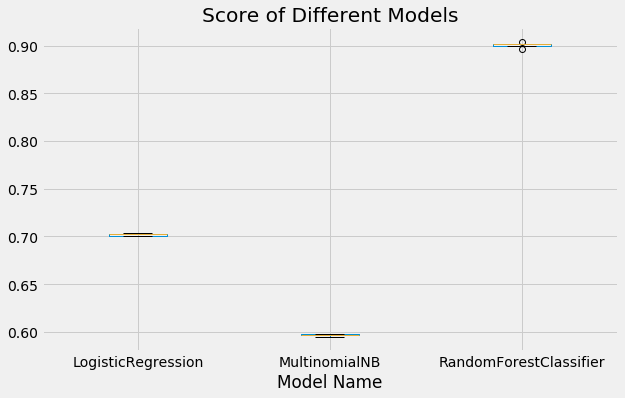

In [413]:
# Check results visually using boxplot
fig = cv_df.boxplot(by='model_name', column=['accuracy'], figsize=(10,6)).get_figure()

plt.xlabel('Model Name')
plt.title('Score of Different Models')
plt.suptitle('')

plt.show();
fig.savefig('modelcomparison.png', bbox_inches='tight');